<a href="https://colab.research.google.com/github/SamadhiyaAditya/colab-notebooks/blob/main/GenAiLecMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import models, layers

In [2]:
model=models.Sequential([
    layers.Dense(256, input_shape=(32,)),
    layers.Dense(32),
    layers.Dense(16),
    layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,217 (67.25 KB)

 Trainable params: 17,217 (67.25 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Generate full random dataset
# X: 6000 samples, 32 features
X = np.random.rand(6000, 32)
# y: 6000 samples, output either 0 or 1
y = np.random.randint(0, 2, 6000)

print(f"Total X shape: {X.shape}")
print(f"Total y shape: {y.shape}")

Total X shape: (6000, 32)
Total y shape: (6000,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [8]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val))

Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4952 - loss: 0.3231 - val_accuracy: 0.5135 - val_loss: 0.2588
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4933 - loss: 0.2679 - val_accuracy: 0.4948 - val_loss: 0.2599
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5117 - loss: 0.2582 - val_accuracy: 0.4740 - val_loss: 0.2597
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5151 - loss: 0.2577 - val_accuracy: 0.4854 - val_loss: 0.2637
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5141 - loss: 0.2590 - val_accuracy: 0.5010 - val_loss: 0.2810
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4765 - loss: 0.2665 - val_accuracy: 0.4938 - val_loss: 0.2555
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5004 - loss: 0.2528 - val_accuracy: 0.4948 - val_loss: 0.2601
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5094 - loss: 0.2540 - val_accuracy: 0.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data loaded.


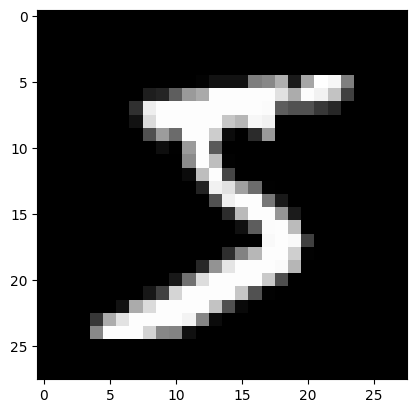

Label: 5


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0 to 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Data loaded.") # Visualize a single digit
plt.imshow(X_train[0], cmap='gray')
plt.show()
print("Label:", y_train[0])

In [10]:
# Flatten data (28x28 -> 784)
x_train_flat = X_train.reshape((-1, 784))
x_test_flat = X_test.reshape((-1, 784))

In [11]:
model=DecisionTreeClassifier()
model.fit(x_train_flat,y_train)

DecisionTreeClassifier()

In [14]:
y_pred=model.predict(x_test_flat)
accuracy_score(y_test,y_pred)

0.8781

In [16]:
model=LogisticRegression()
model.fit(x_train_flat,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred=model.predict(x_test_flat)
accuracy_score(y_test,y_pred)

0.9256

In [23]:
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(16, activation='sigmoid'),
    layers.Dense(10, activation='softmax') #We get probabilities of each digit, softmax helps us choose one of them
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Loss function for multiple classes
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
x_train_flat.shape

(60000, 784)

In [25]:
model.fit(x_train_flat, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7946 - loss: 1.0321
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9582 - loss: 0.1979
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9734 - loss: 0.1097
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9835 - loss: 0.0709
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9879 - loss: 0.0511
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9908 - loss: 0.0382
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9928 - loss: 0.0300
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9952 - loss: 0.0218
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9966 - loss: 0.0157
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9964 - loss: 0.0146


In [26]:
loss, mlp_acc = model.evaluate(x_test_flat, y_test)
mlp_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9783 - loss: 0.0843


0.9817000031471252

In [27]:
from google.colab import files
from PIL import Image
import numpy as np

# 1. Upload the image
uploaded = files.upload()
filename = next(iter(uploaded)) # Gets the name of the file you just uploaded

# 2. Load and process the image
img = Image.open(filename).convert('L')  # Convert to grayscale (black and white)
img = img.resize((28, 28))               # Resize to 28x28 pixels
img_array = np.array(img)                # Turn into numbers

# 3. Invert colors (MNIST is white text on black background, but you likely wrote black on white)
img_array = 255 - img_array

# 4. Normalize and Flatten
img_array = img_array / 255.0            # Scale to 0-1
img_flat = img_array.reshape(1, 784)     # Flatten to (1, 784)

# 5. Predict
prediction = model.predict(img_flat)
print(f"I think you wrote a: {np.argmax(prediction)}")

StopIteration: 